In [1]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
# plt.rcParams['axes.grid'] = True
# sns.set()

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

from hypers import weight_hypers
from hypers import alpha_hypers

In [3]:
series_type = "default"
from_start = False
a, b = -40, 40
train_window = 10

# Cоздание синтезатора, cпособного создавать workers_num наборов параметров, для каждого из которых генерировать временные ряды.
# Сигнал - случайный вектор из нормального распределения. Отклик - скалярное произведение сигнала на вектор весов плюс нормальный шум из N(0,1)
synt = Synthesizer(series_type, dim=20, low=-10, high=10, clip=(2 * a, 2 * b),
                   noise_var=1, workers_num=3, random_seed=16)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(series_type, synt)

# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(length=1500, from_start=from_start, lower_bound=100, upper_bound=400, alternating=True)


In [4]:
# gen.show_time_series()

In [5]:
# gen.draw_merged()

In [6]:
gen.launch()
algo = Algorithm(series_type, gen, train_window=train_window, a=a, b=b, init_pretrained=False)
algo.run()
algo.post_calculations(from_start=from_start)

100%|████████████████████████████████████████████████████████████████████████| 2328/2328 [01:00<00:00, 38.16it/s]


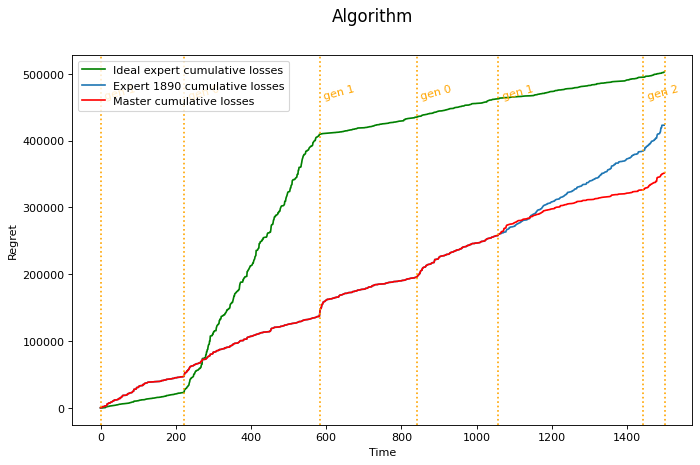

In [7]:
algo.draw_all(show=["master", "ideal"], show_experts=[1890], 
                          show_axes=["regret"], height_ratios=[1], fig_size=(10, 6))